In [10]:
from sklearn.tree import plot_tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [4]:
data = pd.read_csv('datasets/data.csv')

DecsionTreeClassifier: accuracy = 0.964


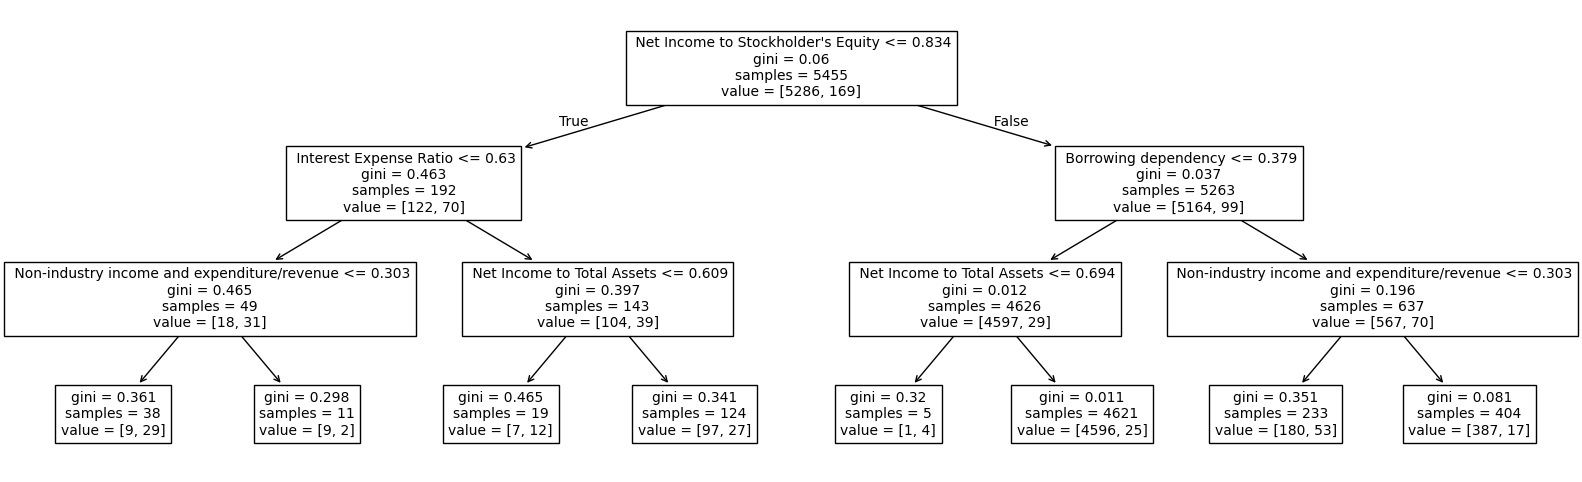

In [11]:
y = data['Bankrupt?']
x = data.drop('Bankrupt?', axis=1)
depth = 3

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

sk_model = DecisionTreeClassifier(max_depth=depth,
                                  random_state=1)
sk_model.fit(x_train, y_train)
sk_pred = sk_model.predict(x_test)
acc = (y_test == sk_pred).mean()
print('DecsionTreeClassifier: accuracy = {:.3f}'.format(acc))

feature_names = x.columns.tolist()
plt.figure(figsize = (20,6))
tree.plot_tree(sk_model,
               feature_names=feature_names,fontsize=10)
plt.show()

Depth = 1, train_acc = 0.9667, eval_acc = 0.9775
Depth = 2, train_acc = 0.9694, eval_acc = 0.9795
Depth = 3, train_acc = 0.9728, eval_acc = 0.9775
Depth = 4, train_acc = 0.9757, eval_acc = 0.9736
Depth = 5, train_acc = 0.9786, eval_acc = 0.9726
Depth = 6, train_acc = 0.9828, eval_acc = 0.9609
Depth = 7, train_acc = 0.9874, eval_acc = 0.9638
Depth = 8, train_acc = 0.9925, eval_acc = 0.9629


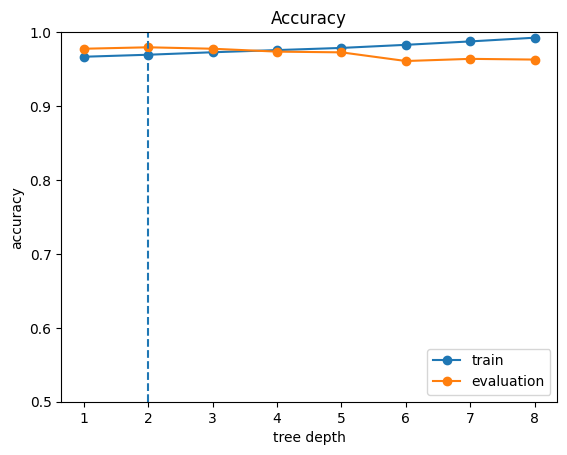

In [12]:
y = data['Bankrupt?']
x = data.drop('Bankrupt?', axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

x_test, x_eval, y_test, y_eval = train_test_split(x_test,y_test, test_size = 0.5)

train_acc = []
eval_acc = []
max_depth = 8
for d in range(1, max_depth+1):
    model  =DecisionTreeClassifier(max_depth = d)
    model.fit(x_train, y_train)

    y_pred = model.predict(x_train)
    train_acc.append((y_pred == y_train).mean())

    y_pred  = model.predict(x_eval)
    eval_acc.append((y_pred == y_eval).mean())
    print('Depth = {}, train_acc = {:.4f}, eval_acc = {:.4f}'\
          .format(d,train_acc[-1], eval_acc[-1]))
    
opt_depth = np.argmax(eval_acc) + 1

plt.plot(train_acc, marker='o', label='train')
plt.plot(eval_acc, marker='o', label='evaluation')
plt.legend()
plt.title('Accuracy')
plt.xlabel('tree depth')
plt.ylabel('accuracy')
plt.xticks(np.arange(max_depth), np.arange(1, max_depth + 1))
plt.axvline(x=opt_depth-1, ls='--')
plt.ylim(0.5,1.0)
plt.show()

Optimal depth = 2, test_acc = 0.9619


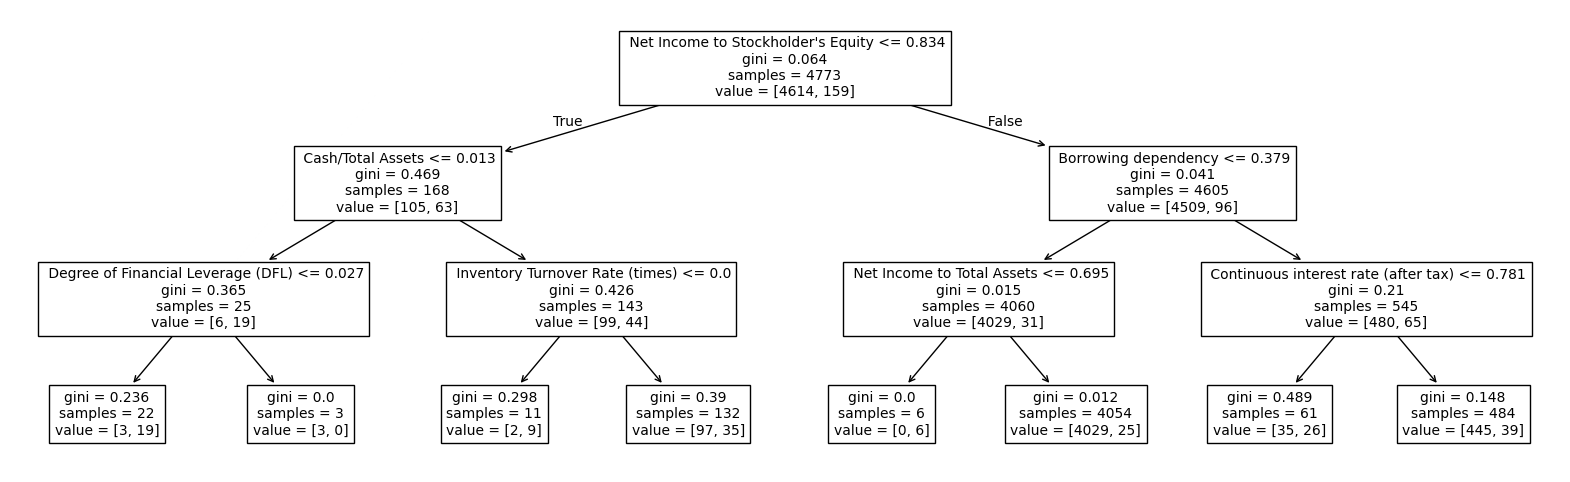

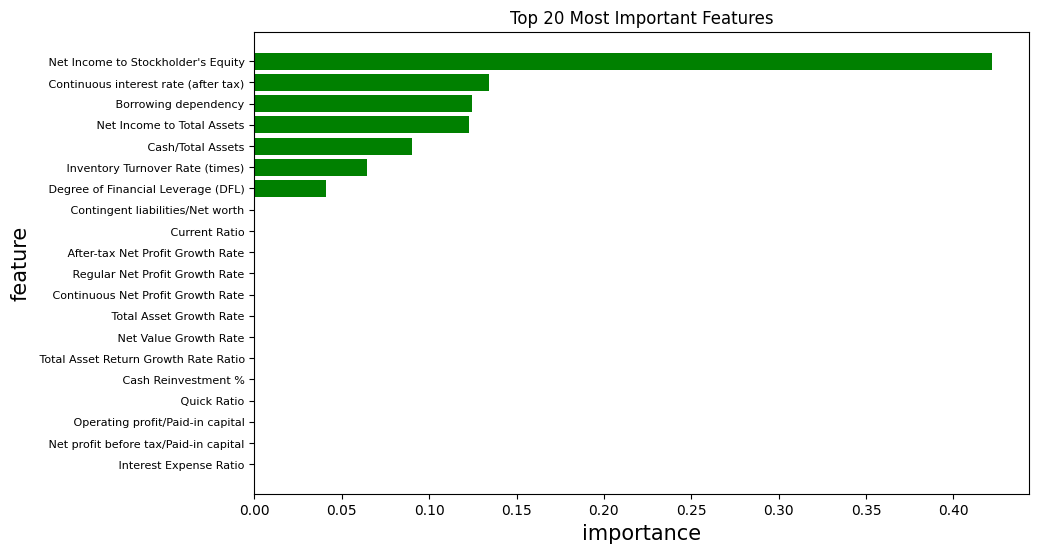

feature importance = [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.134 0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.124 0.    0.    0.    0.    0.    0.    0.    0.065
 0.    0.    0.    0.    0.    0.    0.    0.    0.09  0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.123 0.    0.    0.    0.422 0.    0.041 0.    0.    0.   ]


In [14]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
test_acc = (y_pred == y_test).mean()
print('Optimal depth = {}, test_acc = {:.4f}'.format(opt_depth, test_acc))

feat_names = x.columns.tolist()
plt.figure(figsize=(20,6))
tree.plot_tree(model,feature_names=feat_names, fontsize=10)
plt.show()

feature_importance = model.feature_importances_
# Sort features by importance and get top 20
sorted_idx = np.argsort(feature_importance)
top_20_idx = sorted_idx[-20:]
top_20_importance = feature_importance[top_20_idx]
top_20_features = [feat_names[i] for i in top_20_idx]

plt.figure(figsize=(10,6))
plt.barh(np.arange(len(top_20_idx)), top_20_importance, align='center', color='green')
plt.yticks(np.arange(len(top_20_idx)), top_20_features, size=8)
plt.xlabel('importance', size=15)
plt.ylabel('feature', size=15)
plt.title('Top 20 Most Important Features')
plt.show()

print('feature importance = {}'.format(feature_importance.round(3)))